# Field rotations

There is a method that can be used to rotate the field from one cartesian coordinate system to another.
![rotations1](Figures/coor_rotation.png)

Let us first define the field we are going to work with.

In [1]:
import discretisedfield as df
import numpy as np

p1 = (-50, -30, -10)
p2 = (50, 30, 10)
n = (15, 15, 15)
mesh = df.Mesh(p1=p1, p2=p2, n=n)
field = df.Field(mesh, dim=3, value=(0, 1, 1))

## 1. Unrotated Field

We can show is the plot of all the cells where the value is non-zero. This can be useful, to inspect the domain created, by plotting the norm.

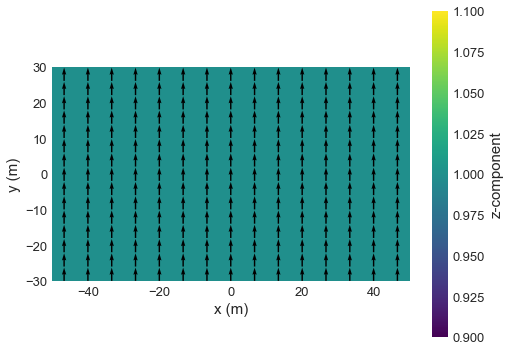

In [2]:
field.plane('z').mpl()

## 2. The Field rotator

We use a `FieldRotator` object in order to deal with rotations of the field. We can create this object using the `df.FieldRotator` function.

In [3]:
field_rotator = df.FieldRotator(field)

The `FieldRotator` uses `scipy` rotation methods in order to generate a rotation matrix by which to rotate the field class by. To rotate the object, a `scipy` rotation method must be specified along with the corresponding arguments.

In [4]:
field_rotator.rotate(method='from_euler', seq='x', angles=np.pi/2)

A field object can be returned using `field_rotator.field`, hence all of the normal field methods can be used.

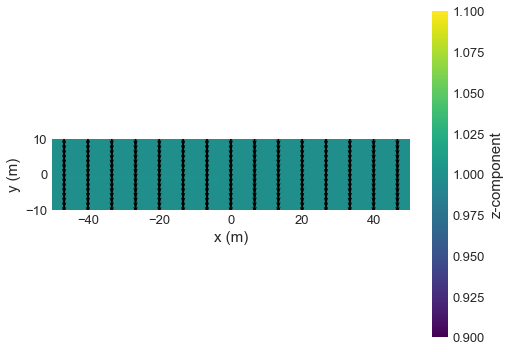

In [5]:
field_rotator.field.plane('z').mpl()

The `FieldRotator` object accumulates rotations of the initial field.

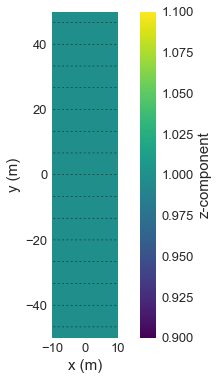

In [6]:
field_rotator.rotate(method='from_euler', seq='z', angles=np.pi/2)
field_rotator.field.plane('z').mpl()

To remove all previous rotations the `clear_rotation` method.

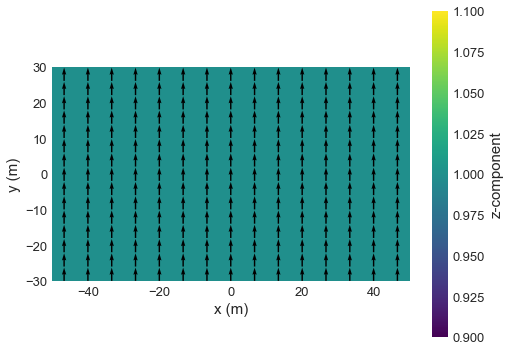

In [7]:
field_rotator.clear_rotation()
field_rotator.field.plane('z').mpl()

## 3. Arbitrary rotations

The rotations shown so far are 90 and 180 degree rotations, however it is possible to do rotations of an arbitrary angle. In this case a new mesh and region is automatically created to encompass the new rotated region.
This adaptive sizing is demonstrated for a two dimensional plane in the following figure
![region](Figures/new_region.png)

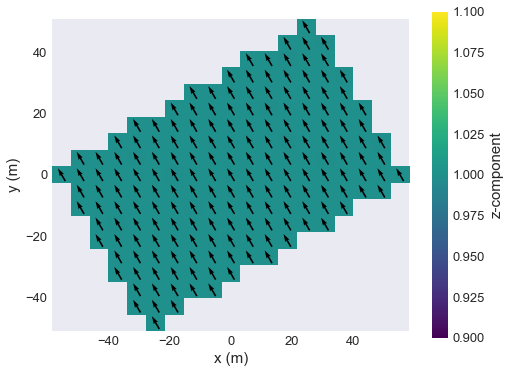

In [8]:
field_rotator = df.FieldRotator(field)
field_rotator.rotate(method='from_euler', seq='z', angles=np.pi/6)
field_rotator.field.plane('z').mpl()

The rotated field can be seen to have jagged edges caused by the discretisation of the mesh. The number of cells has also changed compared to the original field.

In [9]:
field.mesh.n

(15, 15, 15)

In [10]:
field_rotator.field.mesh.n

(19, 19, 19)

The rotation is achieved by linear interpolation of the rotated object from the old mesh into the new mesh. We can change the number of discretisation cells in the new mesh by passing `n` to the rotate function.

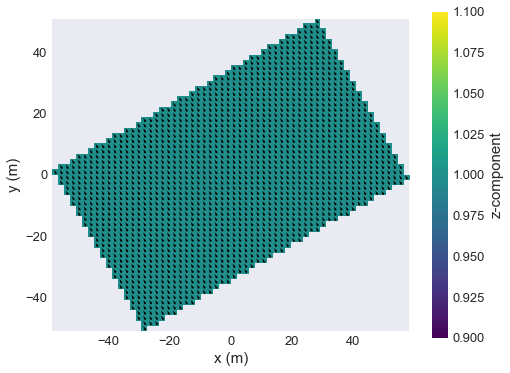

In [11]:
field_rotator.clear_rotation()
field_rotator.rotate(method='from_euler', seq='z', angles=np.pi/6, n=(60, 60, 20))
field_rotator.field.plane('z').mpl()

## 4. align_vector method

Along with the `scipy` rotation methods, we have also included the `align_vector` method which can rotate from an initial vector to a final vector.

In [12]:
p1 = (-10, -10, -10)
p2 = (10, 10, 10)
n = (20, 20, 20)
mesh = df.Mesh(p1=p1, p2=p2, n=n)
field = df.Field(mesh, dim=3, value=(1, 1, 1))

Here we rotate the \[111\] to be the new \[001\].

In [13]:
field_rotator = df.FieldRotator(field)
field_rotator.rotate(method='align_vector', initial=(1,1,1), final=(0,0,1))

When dealing with three dimensional fields `k3d` van be a very useful tool for visualisation.

In [14]:
field_rotator.field.z.k3d.nonzero()

Output()

In [15]:
field_rotator.field.k3d.vector()

Output()

## Other

Full description of all existing functionality can be found in the [API Reference](https://discretisedfield.readthedocs.io/en/latest/_autosummary/discretisedfield.field_rotator.html).